In [1]:
import torch
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torchvision.transforms.functional as F


import utils

In [2]:
model = maskrcnn_resnet50_fpn(pretrained=True, progress=False)
model = model.eval()

inst_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

inst_class_to_idx = {cls: idx for (idx, cls) in enumerate(inst_classes)}

In [3]:
DATA_PATH = './dataset/medium/'
embed = lambda x: torch.tensor([0])
dataset = utils.ColorfulClothesBin(DATA_PATH, embed=embed, train=True)

In [4]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [5]:
data = dataset[2010]
org_img, img, _, _ = data
print(img)
img = img.unsqueeze(0)
output = model(img)[0]
print([inst_classes[label] for label in output['labels']])

tensor([[[0.6667, 0.6863, 0.6863,  ..., 0.9176, 0.9294, 0.9294],
         [0.6745, 0.7020, 0.7020,  ..., 0.9176, 0.9294, 0.9294],
         [0.6902, 0.7216, 0.7137,  ..., 0.9176, 0.9255, 0.9216],
         ...,
         [0.7373, 0.7333, 0.7647,  ..., 0.1882, 0.5098, 0.5373],
         [0.7686, 0.7490, 0.7569,  ..., 0.1059, 0.4078, 0.5647],
         [0.7451, 0.7216, 0.7490,  ..., 0.0745, 0.1647, 0.5529]],

        [[0.7373, 0.7569, 0.7569,  ..., 0.9137, 0.9255, 0.9255],
         [0.7333, 0.7608, 0.7608,  ..., 0.9137, 0.9255, 0.9255],
         [0.7333, 0.7647, 0.7647,  ..., 0.9137, 0.9216, 0.9176],
         ...,
         [0.7176, 0.7137, 0.7451,  ..., 0.0588, 0.3020, 0.2902],
         [0.7412, 0.7216, 0.7294,  ..., 0.0510, 0.2471, 0.3216],
         [0.7098, 0.6941, 0.7216,  ..., 0.0706, 0.0392, 0.3176]],

        [[0.7451, 0.7647, 0.7725,  ..., 0.8941, 0.9059, 0.9059],
         [0.7451, 0.7804, 0.7804,  ..., 0.8941, 0.9059, 0.9059],
         [0.7490, 0.7882, 0.7882,  ..., 0.8980, 0.9020, 0.

shape = torch.Size([25, 1, 224, 224]), dtype = torch.bool
shape of image = torch.Size([3, 224, 224])


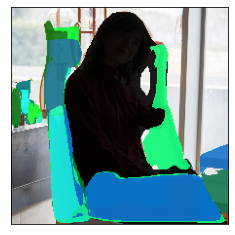

In [6]:
proba_threshold = 0.5
bool_masks = output['masks'] > proba_threshold
print(f"shape = {bool_masks.shape}, dtype = {bool_masks.dtype}")
print(f"shape of image = {org_img.shape}")

# There's an extra dimension (1) to the masks. We need to remove it
bool_masks = bool_masks.squeeze(1)

show(draw_segmentation_masks(org_img, bool_masks, alpha=0.9))